# IE 582 - MERT ÇETİNKAYA - 2018702012 - HOMEWORK4

# Task 1

In [1]:
#We read our data firstly. Then we choose the Premier League matches.
set.seed(1)
matches=read.csv("C:/Users/mertc/Desktop/boun/2019fall/data_mining/week10/hw4/data/matches.csv")
bets=read.csv("C:/Users/mertc/Desktop/boun/2019fall/data_mining/week10/hw4/data/bets.csv")
booking=read.csv("C:/Users/mertc/Desktop/boun/2019fall/data_mining/week10/hw4/data/booking.csv")
goals=read.csv("C:/Users/mertc/Desktop/boun/2019fall/data_mining/week10/hw4/data/goals.csv")
stats=read.csv("C:/Users/mertc/Desktop/boun/2019fall/data_mining/week10/hw4/data/stats.csv")
matches=matches[matches$league_id==148,]

In [2]:
#We select finished matches. Then we define some new columns and fill them with 1 or 0 according to result of match.
library(tidyr)
matches=matches %>% drop_na(match_status)
matches['hometeam_win']=ifelse(matches$match_hometeam_score>matches$match_awayteam_score,1,0)
matches['tie']=ifelse(matches$match_hometeam_score==matches$match_awayteam_score,1,0)
matches['awayteam_win']=ifelse(matches$match_hometeam_score<matches$match_awayteam_score,1,0)

In [3]:
#We start extracting relevant features other than odds. I started with calculating total points in the last 5 games for
#hometeam and awayteam. A team with lots of points may be more prone to score goals or a team with very few points
#may be more prone to concede goals and this influences number of goals in a match.
#Let's start with hometeam
for (i in matches$match_id){   
        win=0
        loss=0
        tie=0
        #we define new columns and equate them to 0 firstly.
        matches[matches$match_id==i,"hometeam_win_number"]=win
        matches[matches$match_id==i,"hometeam_tie_number"]=tie
        matches[matches$match_id==i,"hometeam_loss_number"]=loss
        #We find old matches of hometeam and get 5 of the most recent of them if 5 or more old matches exist.
        #if there is less than 5 number of old matches. We get all of them.
        e=matches[matches$match_id==i,"epoch"]
        matches2=matches[matches$epoch<e,]
        matches2=matches2[(matches2$match_hometeam_id==matches[matches$match_id==i,2] 
                           | matches2$match_awayteam_id==matches[matches$match_id==i,2]),]
    
        matches2=matches2[order(matches2$epoch,decreasing = T),]
        max=nrow(matches2)
        if(max>5){max=5}
        if (max>0){matches2=matches2[1:max,]}
        if(max>0){
        #We make win, tie and loss number calculation in these matches if there is at least 1 match.
            for (j in 1:max){

                    if(matches2[j,1]==matches[matches$match_id==i,2] & matches2[j,20]==1){

                        win=win+1
                    }
                    if(matches2[j,1]==matches[matches$match_id==i,2] & matches2[j,18]==1){

                        loss=loss+1
                    }
                    if(matches2[j,2]==matches[matches$match_id==i,2] & matches2[j,18]==1){

                        win=win+1
                    }
                    if(matches2[j,2]==matches[matches$match_id==i,2] & matches2[j,20]==1){

                        loss=loss+1
                    }
                    if(matches2[j,19]==1){

                        tie=tie+1
                    }
                }
            #We make necessary assignments to matches table.
            matches[matches$match_id==i,"hometeam_win_number"]=win
        matches[matches$match_id==i,"hometeam_tie_number"]=tie
        matches[matches$match_id==i,"hometeam_loss_number"]=loss
        
        }
        
    }
   #We make the same calculations for awayteam. 
   for (i in matches$match_id){  
        win=0
        loss=0
        tie=0
        matches[matches$match_id==i,"awayteam_win_number"]=win
        matches[matches$match_id==i,"awayteam_tie_number"]=tie
        matches[matches$match_id==i,"awayteam_loss_number"]=loss
        
        e=matches[matches$match_id==i,"epoch"]
        matches2=matches[matches$epoch<e,]
        matches2=matches2[(matches2$match_hometeam_id==matches[matches$match_id==i,1] 
                           | matches2$match_awayteam_id==matches[matches$match_id==i,1]),]
    
        matches2=matches2[order(matches2$epoch,decreasing = T),]
        max=nrow(matches2)
        if(max>5){max=5}
        if (max>0){matches2=matches2[1:max,]}
        if(max>0){
        
            for (j in 1:max){

                    if(matches2[j,1]==matches[matches$match_id==i,1] & matches2[j,20]==1){

                        win=win+1
                    }
                    if(matches2[j,1]==matches[matches$match_id==i,1] & matches2[j,18]==1){

                        loss=loss+1
                    }
                    if(matches2[j,2]==matches[matches$match_id==i,1] & matches2[j,18]==1){

                        win=win+1
                    }
                    if(matches2[j,2]==matches[matches$match_id==i,1] & matches2[j,20]==1){

                        loss=loss+1
                    }
                    if(matches2[j,19]==1){

                        tie=tie+1
                    }
                }
            matches[matches$match_id==i,"awayteam_win_number"]=win
        matches[matches$match_id==i,"awayteam_tie_number"]=tie
        matches[matches$match_id==i,"awayteam_loss_number"]=loss
        
        }
        
       
        
    }

#We make point calculations for 5 last matches and update the matches table. Then, delete added and used columns for this
#calculation
matches[,"hometeam_points"]=3*matches[,"hometeam_win_number"]+1*matches[,"hometeam_tie_number"]
matches[,"awayteam_points"]=3*matches[,"awayteam_win_number"]+1*matches[,"awayteam_tie_number"]
matches[,c("hometeam_win_number","hometeam_tie_number","hometeam_loss_number",
          "awayteam_win_number","awayteam_tie_number","awayteam_loss_number")]=NULL
#We print first rows of matches table.
head(matches)

,match_awayteam_id,match_hometeam_id,match_id,epoch,match_status,match_live,match_hometeam_name,match_awayteam_name,match_hometeam_score,match_awayteam_score,...,match_hometeam_extra_score,match_awayteam_extra_score,match_hometeam_penalty_score,match_awayteam_penalty_score,league_id,hometeam_win,tie,awayteam_win,hometeam_points,awayteam_points
2,2614,2619,13331,1505561400,Finished,0,Crystal Palace,Southampton,0,1,...,0,1,NA,NA,148,0,0,1,0,0
6,2626,2623,13329,1505570400,Finished,0,Watford,Manchester City,0,6,...,0,3,NA,NA,148,0,0,1,0,0
7,2629,2621,13327,1505570400,Finished,0,Liverpool,Burnley,1,1,...,1,1,NA,NA,148,0,1,0,0,0
8,2641,2654,13456,1505570400,Finished,0,Sheffield Utd,Norwich,0,1,...,0,1,NA,NA,148,0,0,1,0,0
28,2617,2616,13324,1505651400,Finished,0,Chelsea,Arsenal,0,0,...,0,0,NA,NA,148,0,1,0,0,0
40,2612,2627,13323,1505660400,Finished,0,Manchester United,Everton,4,0,...,1,0,NA,NA,148,1,0,0,0,0


In [4]:
#We also calculated the total points won by hometeam and awayteam in last 5 matches between these 2 teams according to
#hometeam of current match. We made similar calculations to the above calculation and we print first rows of our new table.
#If one team is very dominant this may increase the number of goals in a match.
for (i in matches$match_id){   
        win=0
        loss=0
        tie=0
    
        matches[matches$match_id==i,"hometeam_win_number_btw"]=win
        matches[matches$match_id==i,"hometeam_tie_number_btw"]=tie
        matches[matches$match_id==i,"hometeam_loss_number_btw"]=loss
        
   # get btw matches 
    e=matches[matches$match_id==i,"epoch"]
        matches3=matches[matches$epoch<e,]
        
 matches3=matches3[(matches3$match_hometeam_id==matches[matches$match_id==i,2] 
           | matches3$match_awayteam_id==matches[matches$match_id==i,2]) & 
          (matches3$match_awayteam_id==matches[matches$match_id==i,1] 
           | matches3$match_hometeam_id==matches[matches$match_id==i,1]),]
    
        matches3=matches3[order(matches3$epoch,decreasing = T),]
        max=nrow(matches3)
        if(max>5){max=5}
        if (max>0){matches3=matches3[1:max,]}
        if(max>0){
        
            for (j in 1:max){

                    if(matches3[j,1]==matches[matches$match_id==i,2] & matches3[j,20]==1){

                        win=win+1
                    }
                    if(matches3[j,1]==matches[matches$match_id==i,2] & matches3[j,18]==1){

                        loss=loss+1
                    }
                    if(matches3[j,2]==matches[matches$match_id==i,2] & matches3[j,18]==1){

                        win=win+1
                    }
                    if(matches3[j,2]==matches[matches$match_id==i,2] & matches3[j,20]==1){

                        loss=loss+1
                    }
                    if(matches3[j,19]==1){

                        tie=tie+1
                    }
                }
            matches[matches$match_id==i,"hometeam_win_number_btw"]=win
        matches[matches$match_id==i,"hometeam_tie_number_btw"]=tie
        matches[matches$match_id==i,"hometeam_loss_number_btw"]=loss
        
        }
        
    }

matches[,"hometeam_points_btw"]=3*matches[,"hometeam_win_number_btw"]+1*matches[,"hometeam_tie_number_btw"]
matches[,"awayteam_points_btw"]=3*matches[,"hometeam_loss_number_btw"]+1*matches[,"hometeam_tie_number_btw"]
matches[,c("hometeam_win_number_btw","hometeam_tie_number_btw","hometeam_loss_number_btw")]=NULL

head(matches)

,match_awayteam_id,match_hometeam_id,match_id,epoch,match_status,match_live,match_hometeam_name,match_awayteam_name,match_hometeam_score,match_awayteam_score,...,match_hometeam_penalty_score,match_awayteam_penalty_score,league_id,hometeam_win,tie,awayteam_win,hometeam_points,awayteam_points,hometeam_points_btw,awayteam_points_btw
2,2614,2619,13331,1505561400,Finished,0,Crystal Palace,Southampton,0,1,...,NA,NA,148,0,0,1,0,0,0,0
6,2626,2623,13329,1505570400,Finished,0,Watford,Manchester City,0,6,...,NA,NA,148,0,0,1,0,0,0,0
7,2629,2621,13327,1505570400,Finished,0,Liverpool,Burnley,1,1,...,NA,NA,148,0,1,0,0,0,0,0
8,2641,2654,13456,1505570400,Finished,0,Sheffield Utd,Norwich,0,1,...,NA,NA,148,0,0,1,0,0,0,0
28,2617,2616,13324,1505651400,Finished,0,Chelsea,Arsenal,0,0,...,NA,NA,148,0,1,0,0,0,0,0
40,2612,2627,13323,1505660400,Finished,0,Manchester United,Everton,4,0,...,NA,NA,148,1,0,0,0,0,0,0


In [5]:
#We find average number of goals for and goals against in last 5 matches. This may directly influence number of goals in a 
#match.
#Let's start with hometeam.
for (i in matches$match_id){   
        goals_for=0
        goals_against=0
        #We define new columns and equate them to 0 firstly.
        matches[matches$match_id==i,"hometeam_goals_for"]=goals_for
        matches[matches$match_id==i,"hometeam_goals_against"]=goals_against
        
        #We find old matches of hometeam and get 5 of the most recent of them if 5 or more old matches exist.
        #if there is less than 5 number of old matches. We get all of them.
        e=matches[matches$match_id==i,"epoch"]
        matches4=matches[matches$epoch<e,]
        matches4=matches4[(matches4$match_hometeam_id==matches[matches$match_id==i,2] 
                           | matches4$match_awayteam_id==matches[matches$match_id==i,2]),]
    
        matches4=matches4[order(matches4$epoch,decreasing = T),]
        max=nrow(matches4)
        if(max>5){max=5}
        if (max>0){matches4=matches4[1:max,]}
        if(max>0){
        #We find number of goals for and number of goals against in these matches if there is at least 1 match.
            for (j in 1:max){

                    if(matches4[j,1]==matches[matches$match_id==i,2]){

                        goals_for=goals_for+matches4[j,10]
                        goals_against=goals_against+matches4[j,9]
                    }
                    
                    if(matches4[j,2]==matches[matches$match_id==i,2] ){

                        goals_for=goals_for+matches4[j,9]
                        goals_against=goals_against+matches4[j,10]
                    }
                    
                }
            #We assign average number of goals for and average number of goals against hometeam.
            matches[matches$match_id==i,"hometeam_goals_for"]=goals_for/max
        matches[matches$match_id==i,"hometeam_goals_against"]=goals_against/max
        
        
        }
        
    }
    #We make the same calculations for awayteam as well.
   for (i in matches$match_id){  
        goals_for=0
        goals_against=0
    
        matches[matches$match_id==i,"awayteam_goals_for"]=goals_for
        matches[matches$match_id==i,"awayteam_goals_against"]=goals_against
        
        e=matches[matches$match_id==i,"epoch"]
        matches4=matches[matches$epoch<e,]
        matches4=matches4[(matches4$match_hometeam_id==matches[matches$match_id==i,1] 
                           | matches4$match_awayteam_id==matches[matches$match_id==i,1]),]
    
        matches4=matches4[order(matches4$epoch,decreasing = T),]
        max=nrow(matches4)
        if(max>5){max=5}
        if (max>0){matches4=matches4[1:max,]}
        if(max>0){
        
            for (j in 1:max){

                    if(matches4[j,1]==matches[matches$match_id==i,1] ){

                        goals_for=goals_for+matches4[j,10]
                        goals_against=goals_against+matches4[j,9]
                    }
                  
                    if(matches4[j,2]==matches[matches$match_id==i,1] ){

                        goals_for=goals_for+matches4[j,9]
                        goals_against=goals_against+matches4[j,10]
                    }
                    
                }
            matches[matches$match_id==i,"awayteam_goals_for"]=goals_for/max
        matches[matches$match_id==i,"awayteam_goals_against"]=goals_against/max
        
        }
        
       
        
    }


#We print first rows of our matches table.
head(matches)
    

,match_awayteam_id,match_hometeam_id,match_id,epoch,match_status,match_live,match_hometeam_name,match_awayteam_name,match_hometeam_score,match_awayteam_score,...,tie,awayteam_win,hometeam_points,awayteam_points,hometeam_points_btw,awayteam_points_btw,hometeam_goals_for,hometeam_goals_against,awayteam_goals_for,awayteam_goals_against
2,2614,2619,13331,1505561400,Finished,0,Crystal Palace,Southampton,0,1,...,0,1,0,0,0,0,0,0,0,0
6,2626,2623,13329,1505570400,Finished,0,Watford,Manchester City,0,6,...,0,1,0,0,0,0,0,0,0,0
7,2629,2621,13327,1505570400,Finished,0,Liverpool,Burnley,1,1,...,1,0,0,0,0,0,0,0,0,0
8,2641,2654,13456,1505570400,Finished,0,Sheffield Utd,Norwich,0,1,...,0,1,0,0,0,0,0,0,0,0
28,2617,2616,13324,1505651400,Finished,0,Chelsea,Arsenal,0,0,...,1,0,0,0,0,0,0,0,0,0
40,2612,2627,13323,1505660400,Finished,0,Manchester United,Everton,4,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
#We also find average number of goals for and goals against in last 5 matches between 2 teams according to
#hometeam of current match. This may directly influence number of goals in a match. As we did above, here as well, if there
#are less than 5 matches between 2 teams we make our calculations according to number of matches between them. If there are 
#more than 5 matches we get last 5 matches.
#We make similar calculations to the calculations above.

for (i in matches$match_id){   
        goals_for=0
        goals_against=0
    
        matches[matches$match_id==i,"hometeam_goals_for_btw"]=goals_for
        matches[matches$match_id==i,"hometeam_goals_against_btw"]=goals_against
        
   # get btw matches 
    e=matches[matches$match_id==i,"epoch"]
        matches5=matches[matches$epoch<e,]
        
 matches5=matches5[(matches5$match_hometeam_id==matches[matches$match_id==i,2] 
           | matches5$match_awayteam_id==matches[matches$match_id==i,2]) & 
          (matches5$match_awayteam_id==matches[matches$match_id==i,1] 
           | matches5$match_hometeam_id==matches[matches$match_id==i,1]),]
    
        matches5=matches5[order(matches5$epoch,decreasing = T),]
        max=nrow(matches5)
        if(max>5){max=5}
        if (max>0){matches5=matches5[1:max,]}
        if(max>0){
        
            for (j in 1:max){

                    if(matches5[j,1]==matches[matches$match_id==i,2]){

                        goals_for=goals_for+matches5[j,10]
                        goals_against=goals_against+matches5[j,9]
                    }
                    
                    if(matches5[j,2]==matches[matches$match_id==i,2] ){

                        goals_for=goals_for+matches5[j,9]
                        goals_against=goals_against+matches5[j,10]
                    }
                }
            matches[matches$match_id==i,"hometeam_goals_for_btw"]=goals_for/max
        matches[matches$match_id==i,"hometeam_goals_against_btw"]=goals_against/max
        
        }
        
    }

#We print the first rows of our table.
head(matches)

,match_awayteam_id,match_hometeam_id,match_id,epoch,match_status,match_live,match_hometeam_name,match_awayteam_name,match_hometeam_score,match_awayteam_score,...,hometeam_points,awayteam_points,hometeam_points_btw,awayteam_points_btw,hometeam_goals_for,hometeam_goals_against,awayteam_goals_for,awayteam_goals_against,hometeam_goals_for_btw,hometeam_goals_against_btw
2,2614,2619,13331,1505561400,Finished,0,Crystal Palace,Southampton,0,1,...,0,0,0,0,0,0,0,0,0,0
6,2626,2623,13329,1505570400,Finished,0,Watford,Manchester City,0,6,...,0,0,0,0,0,0,0,0,0,0
7,2629,2621,13327,1505570400,Finished,0,Liverpool,Burnley,1,1,...,0,0,0,0,0,0,0,0,0,0
8,2641,2654,13456,1505570400,Finished,0,Sheffield Utd,Norwich,0,1,...,0,0,0,0,0,0,0,0,0,0
28,2617,2616,13324,1505651400,Finished,0,Chelsea,Arsenal,0,0,...,0,0,0,0,0,0,0,0,0,0
40,2612,2627,13323,1505660400,Finished,0,Manchester United,Everton,4,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
#prob values are found according to bets table. We find the probability value given by each bookmaker for each possible
#result of match and get mean of them for each match. Then, we find probability values given by bookmakers for each result
#of a match.
library(reshape2)
library(dplyr)
bets2=bets
bets2=bets2[bets2$variable %in% c("odd_1","odd_x","odd_2"),]
bets2["prob"]=1/bets2["value"]
bets2=dcast(bets2,match_id+odd_bookmakers+odd_epoch~variable,value.var="prob")
bets2["sum"]=bets2$odd_1+bets2$odd_2+bets2$odd_x
bets2["prob1"]=bets2$odd_1/bets2$sum
bets2["probx"]=bets2$odd_x/bets2$sum
bets2["prob2"]=bets2$odd_2/bets2$sum
bets2=select(bets2,c(1,2,3,8,9,10))
bets2["sum"]=bets2$prob1+bets2$probx+bets2$prob2
bets3=bets2 %>% group_by(match_id) %>% summarise(prob1=mean(prob1),probx=mean(probx),prob2=mean(prob2)) 
bets3["sum"]=bets3$prob1+bets3$probx+bets3$prob2
bets3$sum=NULL #If we comment the code on the left we see that sum value is 1 in each row. This shows that the sum of
#our probability values is 1 for each match and this shows that our calculations are true.

#We print first rows of our table. 
head(bets3)


Attaching package: 'reshape2'

The following object is masked from 'package:tidyr':

    smiths


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



match_id,prob1,probx,prob2
145899,0.1521461,0.1931725,0.6546814
145900,0.4297960,0.2507462,0.3194578
146845,0.4765102,0.2676103,0.2558795
147984,0.4478834,0.2890014,0.2631152
147990,0.4508309,0.2967245,0.2524446
147991,0.5008502,0.2762367,0.2229131


In [8]:
#bets and matches are merged and last_data table with useful data is obtained.
#There are some matches with na prob values which shows that there is not any odd value for those matches.
#We make a left join.
data=merge(matches,bets3,by="match_id",all.x=T )
#We find total goals in each match and if there is more than 2.5 goals in each match.
data[,"total_goals"]=data$match_hometeam_score+data$match_awayteam_score
data[,"total_goals_over_2.5"]=ifelse(data$total_goals>2,1,0)
last_data=data[,c('hometeam_points','awayteam_points','hometeam_points_btw','awayteam_points_btw','hometeam_goals_for',
                  'hometeam_goals_against','awayteam_goals_for','awayteam_goals_against','hometeam_goals_for_btw',
                  'hometeam_goals_against_btw','prob1','probx','prob2','total_goals','total_goals_over_2.5')]
#We print the first rows of our table.
head(last_data)

hometeam_points,awayteam_points,hometeam_points_btw,awayteam_points_btw,hometeam_goals_for,hometeam_goals_against,awayteam_goals_for,awayteam_goals_against,hometeam_goals_for_btw,hometeam_goals_against_btw,prob1,probx,prob2,total_goals,total_goals_over_2.5
1,4,0,0,1.0000000,1.50,1.000000,2.400000,0,0,NA,NA,NA,2,0
7,4,0,0,1.2500000,0.75,1.000000,1.000000,0,0,NA,NA,NA,2,0
1,4,0,0,0.3333333,1.00,1.250000,1.250000,0,0,NA,NA,NA,1,0
3,1,0,0,0.4000000,2.40,1.000000,2.333333,0,0,NA,NA,NA,4,1
10,9,0,0,2.2500000,0.00,2.666667,1.000000,0,0,NA,NA,NA,1,0
6,6,0,0,2.0000000,1.00,1.250000,1.000000,0,0,NA,NA,NA,5,1


In [9]:
#We define total_goals_over_2.5 as factor. We also separate our last_data above into 2 parts to obtain data to use in
#our 2 different problems (the regression problem and the classification problem)
last_data$total_goals_over_2.5=as.factor(last_data$total_goals_over_2.5)
last_data_reg=select(last_data,-total_goals_over_2.5)
last_data_class=select(last_data,-total_goals)

# Task2

### Penalized Regression

In [10]:
library(Metrics)
library(glmnet)
set.seed(1)
#We randomly split our data into training data and test data. We always set seed to 1 for the same randomness.
train_pr <- sample_frac(last_data_class, 0.70,)
sample_id <- as.numeric(rownames(train_pr)) 
test_pr <- last_data_class[-sample_id,]
#Penalized regression does not handle na values. That's why we drop rows with na values. na values comes out because of prob 
#values. This shows that we have no odd information for that match. 
train_pr=train_pr %>% drop_na(prob1)
test_pr=test_pr %>% drop_na(prob1)
#We train our classification model with lambda 0.01 with our training data and make our prediction using the test data.
#Then we look at the accuracy.
pr=glmnet(as.matrix(train_pr[,1:(ncol(train_pr)-1)]),train_pr[,ncol(train_pr)],family="binomial",lambda=0.01)
pred=predict(pr,newx=as.matrix(test_pr[,1:(ncol(test_pr)-1)]),type="class")
print(paste0("Penalized regression accuracy is ",round(accuracy(test_pr$total_goals_over_2.5 , as.factor(pred)),3)))

#We make similar operations with the operations above. However, this time we use our regression data and use mean
#absolute error as our metric to test the performance of our model.
train_pr <- sample_frac(last_data_reg, 0.70,)
sample_id <- as.numeric(rownames(train_pr)) 
test_pr <- last_data_reg[-sample_id,]
train_pr=train_pr %>% drop_na(prob1)
test_pr=test_pr %>% drop_na(prob1)
#lambda is taken again 0.01.
pr=glmnet(as.matrix(train_pr[,1:(ncol(train_pr)-1)]),train_pr[,ncol(train_pr)],lambda=0.01)
pred=predict(pr,newx=as.matrix(test_pr[,1:(ncol(test_pr)-1)]))
print(paste0("Penalized regression mae is ",round(mae(test_pr$total_goals , pred),3)))

Loading required package: Matrix

Attaching package: 'Matrix'

The following objects are masked from 'package:tidyr':

    expand, pack, unpack

Loading required package: foreach
Loaded glmnet 2.0-18


Attaching package: 'glmnet'

The following object is masked from 'package:Metrics':

    auc



[1] "Penalized regression accuracy is 0.538"
[1] "Penalized regression mae is 1.249"


### Decision Tree 

In [11]:
library(rpart)
set.seed(1)
#We make similar operations. Here, we do not have to drop the rows with na values because decision tree can handle them.
#Here, in both models, complexity parameter is taken as 0.01 and minimal number of observation per tree leaf is taken as 10.
train_dt <- sample_frac(last_data_class, 0.70,)
sample_id <- as.numeric(rownames(train_dt)) 
test_dt <- last_data_class[-sample_id,]

tree=rpart(total_goals_over_2.5~.,data=train_dt,method='class',control=rpart.control(cp=0.01,minobsinnode = 10))
pred=predict(tree, newdata=test_dt,type="class")
print(paste0("Decision tree accuracy is ",round(accuracy(test_dt$total_goals_over_2.5 , as.factor(pred)),3)))


train_dt <- sample_frac(last_data_reg, 0.70,)
sample_id <- as.numeric(rownames(train_dt)) 
test_dt <- last_data_reg[-sample_id,]

tree=rpart(total_goals~.,data=train_dt,control=rpart.control(cp=0.01,minobsinnode = 10))
pred=predict(tree, newdata=test_dt)
print(paste0("Decision tree mae is ",round(mae(test_dt$total_goals , pred),3)))

[1] "Decision tree accuracy is 0.615"
[1] "Decision tree mae is 1.246"


 ### Random Forest

In [12]:
library(randomForest)
library(caret)
set.seed(1)
#We make similar operations. Here, we do not have to drop the rows with na values because random forest can handle them.
#Here, in both models, number of tree is taken as 500, minimal number of observation per tree leaf is taken as 5 and number
#of features on which to split each node is taken as 6.
train_rf <- sample_frac(last_data_class, 0.70,)
sample_id <- as.numeric(rownames(train_rf)) 
test_rf <- last_data_class[-sample_id,]

rf = randomForest(total_goals_over_2.5 ~.,data=na.roughfix(train_rf),minobsinnode = 5,ntree=500,mtry=6,na.action=na.roughfix)
pred=predict(rf, newdata=na.roughfix(test_rf))
print(paste0("Random forest accuracy is ",round(accuracy(test_rf$total_goals_over_2.5 , as.factor(pred)),3)))

train_rf <- sample_frac(last_data_reg, 0.70,)
sample_id <- as.numeric(rownames(train_rf)) 
test_rf <- last_data_reg[-sample_id,]

rf = randomForest(total_goals ~.,data=na.roughfix(train_rf),minobsinnode = 5,ntree=500,mtry=6,na.action=na.roughfix)
pred=predict(rf, newdata=na.roughfix(test_rf))
print(paste0("Random forest mae is ",round(mae(test_rf$total_goals , pred),3)))

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:dplyr':

    combine

Loading required package: lattice
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: 'ggplot2'

The following object is masked from 'package:randomForest':

    margin


Attaching package: 'caret'

The following objects are masked from 'package:Metrics':

    precision, recall



[1] "Random forest accuracy is 0.868"
[1] "Random forest mae is 0.715"


### Stochastic Gradient Boosting 

In [13]:
library(gbm)
library(caret)
set.seed(1)
#We make similar operations. Here, we do not have to drop the rows with na values because gradient boosted trees can handle 
#them. Here, in both models, number of trees is taken as 500, minimal number of observation per tree leaf is taken as 10,
#shrinkage is taken as 0.1 and depth is taken as 5.
train_sgb <- sample_frac(last_data_class, 0.70,)
sample_id <- as.numeric(rownames(train_sgb)) 
test_sgb <- last_data_class[-sample_id,]

sgb = gbm(total_goals_over_2.5 ~.,data = train_sgb,distribution = "multinomial",shrinkage = 0.1,interaction.depth = 5,
              n.minobsinnode = 10,n.trees = 500)
pred=predict.gbm(object = sgb,newdata = test_sgb,n.trees = 500, type = "response")
pred = colnames(pred)[apply(pred, 1, which.max)]
print(paste0("Stochastic gradient boosting accuracy is ",round(accuracy(test_sgb$total_goals_over_2.5 , as.factor(pred)),3)))


train_sgb <- sample_frac(last_data_reg, 0.70,)
sample_id <- as.numeric(rownames(train_sgb))
test_sgb <- last_data_reg[-sample_id,]

sgb = gbm(total_goals ~.,data = train_sgb,shrinkage = 0.1,distribution = "gaussian",interaction.depth = 5,
              n.minobsinnode = 10,n.trees = 500)
pred=predict.gbm(object = sgb,newdata = test_sgb,n.trees = 500)
print(paste0("Stochastic gradient boosting mae is ",round(mae(test_sgb$total_goals , pred),3)))

Loaded gbm 2.1.5


[1] "Stochastic gradient boosting accuracy is 0.878"
[1] "Stochastic gradient boosting mae is 0.747"


# Task3

### Penalized Regression

[1] Mean of accuracy values of each fold for training:
[1] 0.597 0.595 0.593 0.594
[1] Mean of accuracy values of each fold for validation:
[1] 0.530 0.530 0.522 0.526


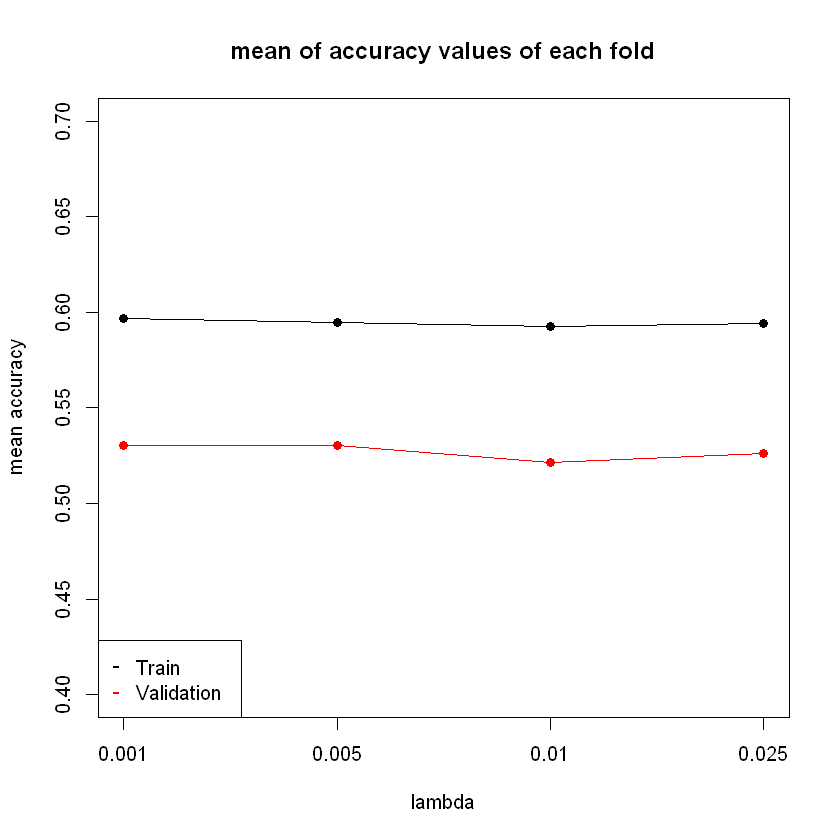

[1] Mean of mae values of each fold for training:
[1] 1.274 1.274 1.276 1.280
[1] Mean of mae values of each fold for validation:
[1] 1.355 1.353 1.352 1.337


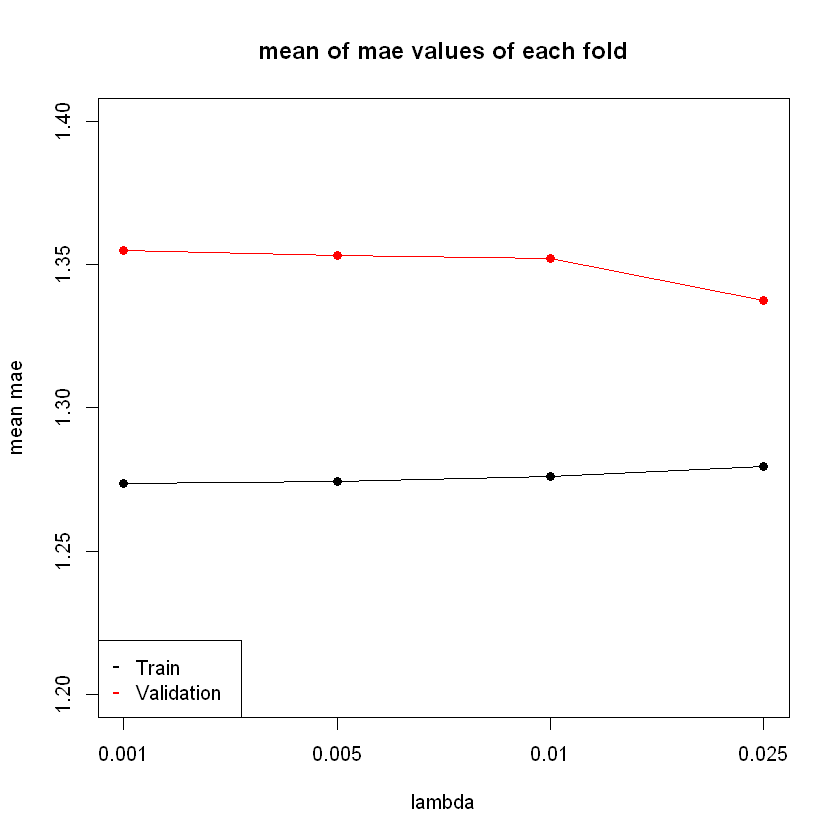

In [14]:
set.seed(1)
#We make 10-fold cross-validation on the training set. We use the same random training set. We also drop rows with na values
#for penalized regression.
train_val <- sample_frac(last_data_class,0.7)
train_val=train_val %>% drop_na(prob1)
#For our cross-validation we use the lambda values in the following vector.
lambda=c(0.001,0.005,0.01,0.025)
#We use a simple logic. We look at the mean of the accuracy values of 10 folds for train and validation set for each parameter
#and we draw these values on a graph and use this graph to find the best parameter value. Here, our parameter is lambda.

#Here we define our vectors where we will store our mean accuracy values of each fold for different values of lambda.
mean_acc_train=c()
mean_acc_val = c()
for (a in lambda){
    #We use the following vectors to store accuracy values for one value of lambda.
    acc_val <- rep(0,10)
    acc_train <- rep(0,10)
    #This is the for loop for 10-fold cross-validation.
    for (i in 1:10) {
        # These indices indicate the interval of the validation set
        indices <- (((i-1) * floor((1/10)*nrow(train_val))) + 1):((i*floor((1/10) * nrow(train_val))))
        
        #We exclude them from the train set
        train <- train_val[-indices,]
        
        #We include them in the validation set
        val <- train_val[indices,]
        
        # A model is learned using training set
        pr=glmnet(as.matrix(train[,1:(ncol(train)-1)]),train[,ncol(train)],family="binomial",lambda=a)
        
        # We make prediction using our model with our training and validation data 
        pred_val=predict(pr,newx=as.matrix(val[,1:(ncol(val)-1)]),type="class")
        pred_train=predict(pr,newx=as.matrix(train[,1:(ncol(train)-1)]),type="class")
                
        #We assign the accuracy of this model to the ith index of the related accuracy vector for training and validation data.
        acc_train[i] <- accuracy(train$total_goals_over_2.5 , as.factor(pred_train))
        acc_val[i] <- accuracy(val$total_goals_over_2.5 , as.factor(pred_val))
        
    }

    #The mean of accuracy vector for that lambda is stored in the related mean accuracy vector.
    mean_acc_train=c(mean_acc_train,mean(acc_train))
    mean_acc_val=c(mean_acc_val,mean(acc_val))
    
}

#Plot for mean accuracy vectors are drawn.
plot(mean_acc_train,type="o",pch=16,col="black",ylim=c(0.4,0.7),xaxt="n",xlab="lambda"
     ,ylab="mean accuracy",main="mean of accuracy values of each fold")
points(mean_acc_val,type="o",pch=16,col="red")
axis(side=1,at=seq_along(lambda),labels=lambda)
legend(x = "bottomleft" , legend = c("Train","Validation"),col=c("black","red"),pch="-")


print("Mean of accuracy values of each fold for training:", quote=F)
print(round(mean_acc_train,3))
print("Mean of accuracy values of each fold for validation:", quote=F)
print(round(mean_acc_val,3))

#The same calculations are done for regression data. This time mean absolute error is used as metric.
train_val=sample_frac(last_data_reg, 0.7,)
train_val=train_val %>% drop_na(prob1)


lambda=c(0.001,0.005,0.01,0.025)
mean_mae_train=c()
mean_mae_val = c()
for (a in lambda){
    mae_val <- rep(0,10)
    mae_train <- rep(0,10)
    
    for (i in 1:10) {
        indices <- (((i-1) * floor((1/10)*nrow(train_val))) + 1):((i*floor((1/10) * nrow(train_val))))
        train <- train_val[-indices,]
        val <- train_val[indices,]
        pr=glmnet(as.matrix(train[,1:(ncol(train)-1)]),train[,ncol(train)],lambda=a)
        pred_val=predict(pr,newx=as.matrix(val[,1:(ncol(val)-1)]))
        pred_train=predict(pr,newx=as.matrix(train[,1:(ncol(train)-1)]))
        mae_train[i] <- mae(train$total_goals , pred_train)
        mae_val[i] <- mae(val$total_goals , pred_val)
    
    }

    
    mean_mae_train=c(mean_mae_train,mean(mae_train))
    mean_mae_val=c(mean_mae_val,mean(mae_val))
    
}


plot(mean_mae_train,type="o",pch=16,col="black",ylim=c(1.2,1.4),xaxt="n",xlab="lambda"
     ,ylab="mean mae",main="mean of mae values of each fold")
points(mean_mae_val,type="o",pch=16,col="red")
axis(side=1,at=seq_along(lambda),labels=lambda)
legend(x = "bottomleft" , legend = c("Train","Validation"),col=c("black","red"),pch="-")


print("Mean of mae values of each fold for training:", quote=F)
print(round(mean_mae_train,3))
print("Mean of mae values of each fold for validation:", quote=F)
print(round(mean_mae_val,3))



During this task we try to choose the best parameters for different algorithms with regards to drawn graphs at the end of cross-validation. While doing this we try to find parameters that give maximum accuracy (for the classification problem) or minimum absolute error (for the regression problem) values in a logical balance between training and validation and try avoiding overfitting.

The best selection for lambda is seen as 0.001 for the classification problem.
The best selection for lambda is seen as 0.025 for the regression problem.

### Decision Tree 

[1] Mean of accuracy values of each fold for training:
 [1] 0.751 0.751 0.751 0.751 0.748 0.748 0.748 0.748 0.725 0.725 0.725 0.725
[13] 0.641 0.641 0.641 0.641
[1] Mean of accuracy values of each fold for validation:
 [1] 0.513 0.513 0.513 0.513 0.523 0.523 0.523 0.523 0.540 0.540 0.540 0.540
[13] 0.560 0.560 0.560 0.560


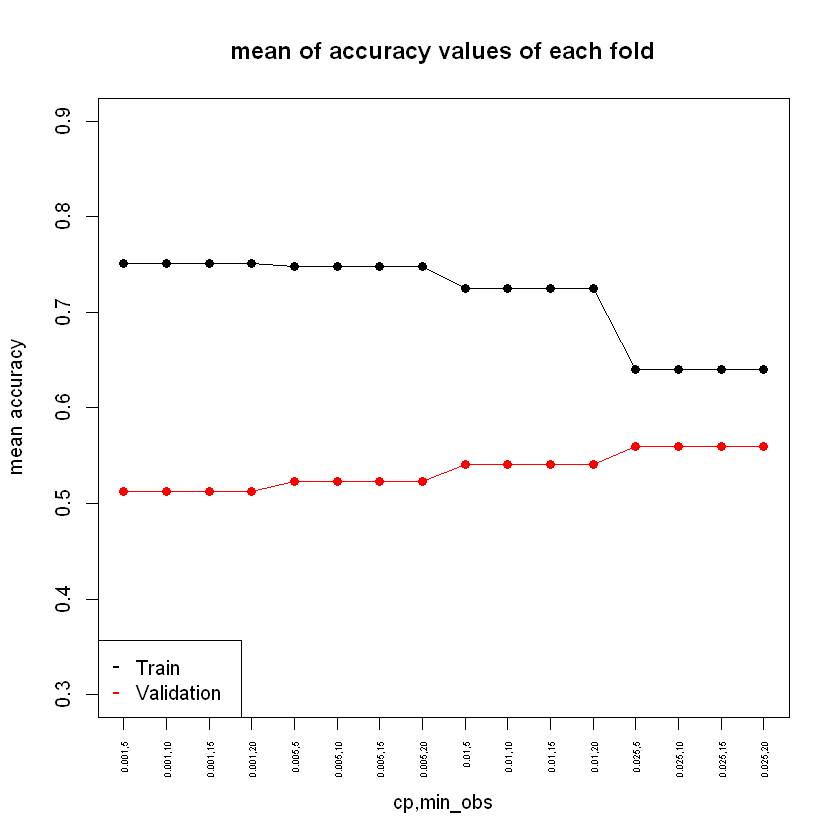

[1] Mean of mae values of each fold for training:
 [1] 1.070 1.070 1.070 1.070 1.090 1.090 1.090 1.090 1.175 1.175 1.175 1.175
[13] 1.295 1.295 1.295 1.295
[1] Mean of mae values of each fold for validation:
 [1] 1.453 1.453 1.453 1.453 1.457 1.457 1.457 1.457 1.373 1.373 1.373 1.373
[13] 1.330 1.330 1.330 1.330


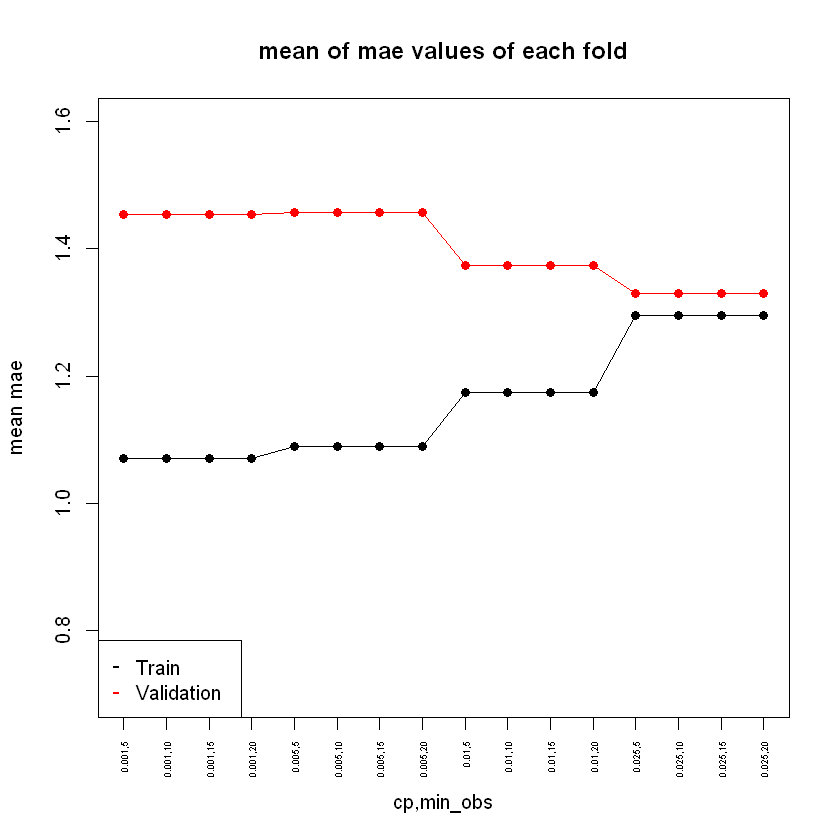

In [15]:
#We apply the same logic (which is the above logic) and cross-validation in decision tree.
#Our parameters are minimal number of observations per tree leaf and complexity parameter.
#The values in the following vector are used and made cross-validation for each pair. Then we draw again the graphes for
#classification and regression with the same logic. Here, because decision tree can handle na values, we do not drop them.
set.seed(1)
min_obs=c(5,10,15,20)
cp=c(0.001,0.005,0.01,0.025)
train_val <- sample_frac(last_data_class,0.7)

mean_acc_train=c()
mean_acc_val = c()

for (a in cp){
    for (b in min_obs){
        acc_val <- rep(0,10)
        acc_train <- rep(0,10)
        
        for (i in 1:10) {
            indices <- (((i-1) * floor((1/10)*nrow(train_val))) + 1):((i*floor((1/10) * nrow(train_val))))
            train <- train_val[-indices,]
            val <- train_val[indices,]
            tree=rpart(total_goals_over_2.5~.,data=train,method='class',control=rpart.control(cp=a,minobsinnode = b))
            pred_train=predict(tree, newdata=train,type="class")
            pred_val=predict(tree, newdata=val,type="class")
            acc_train[i] <- accuracy(train$total_goals_over_2.5 , as.factor(pred_train))
            acc_val[i] <- accuracy(val$total_goals_over_2.5 , as.factor(pred_val))
            
        }

        
        mean_acc_train=c(mean_acc_train,mean(acc_train))
        mean_acc_val=c(mean_acc_val,mean(acc_val))
        
    }
}

indices=c()
for (a in cp){
    for (b in min_obs){
        indices=c(indices,paste0(a,",",b))
    }
}

plot(mean_acc_train,type="o",pch=16,col="black",ylim=c(0.3,0.9),xaxt="n",xlab="cp,min_obs"
     ,ylab="mean accuracy",main="mean of accuracy values of each fold")
points(mean_acc_val,type="o",pch=16,col="red")
axis(side=1,at=seq_along(indices),labels=indices,cex.axis=0.45,las=2)
legend(x = "bottomleft" , legend = c("Train","Validation"),col=c("black","red"),pch="-")

print("Mean of accuracy values of each fold for training:", quote=F)
print(round(mean_acc_train,3))
print("Mean of accuracy values of each fold for validation:", quote=F)
print(round(mean_acc_val,3))

train_val <- sample_frac(last_data_reg,0.7)
mean_mae_train=c()
mean_mae_val = c()

for (a in cp){
    for (b in min_obs){
        mae_val <- rep(0,10)
        mae_train <- rep(0,10)
        
        for (i in 1:10) {
            
            indices <- (((i-1) * floor((1/10)*nrow(train_val))) + 1):((i*floor((1/10) * nrow(train_val))))
            train <- train_val[-indices,]
            val <- train_val[indices,]
            tree=rpart(total_goals~.,data=train,control=rpart.control(cp=a,minobsinnode = b))
            pred_train=predict(tree, newdata=train)
            pred_val=predict(tree, newdata=val)
            mae_train[i] <- mae(train$total_goals , pred_train)
            mae_val[i] <- mae(val$total_goals , pred_val)
            
        }

        
        mean_mae_train=c(mean_mae_train,mean(mae_train))
        mean_mae_val=c(mean_mae_val,mean(mae_val))
        
    }
}


indices=c()
for (a in cp){
    for (b in min_obs){
        indices=c(indices,paste0(a,",",b))
    }
}


plot(mean_mae_train,type="o",pch=16,col="black",ylim=c(0.7,1.6),xaxt="n",xlab="cp,min_obs"
     ,ylab="mean mae",main="mean of mae values of each fold")
points(mean_mae_val,type="o",pch=16,col="red")
axis(side=1,at=seq_along(indices),labels=indices,cex.axis=0.45,las=2)
legend(x = "bottomleft" , legend = c("Train","Validation"),col=c("black","red"),pch="-")


print("Mean of mae values of each fold for training:", quote=F)
print(round(mean_mae_train,3))
print("Mean of mae values of each fold for validation:", quote=F)
print(round(mean_mae_val,3))




The best selection for cp,min_obs is seen as (0.025,5), (0.025,10), (0.025,15) and (0.025,20) for the classification problem.
The best selection for cp,min_obs is seen as (0.025,5), (0.025,10), (0.025,15) and (0.025,20) for the regression problem.

### Random Forest 

[1] Mean of accuracy values of each fold for training:
[1] 0.994 0.994 0.994 0.994
[1] Mean of accuracy values of each fold for validation:
[1] 0.555 0.555 0.545 0.540


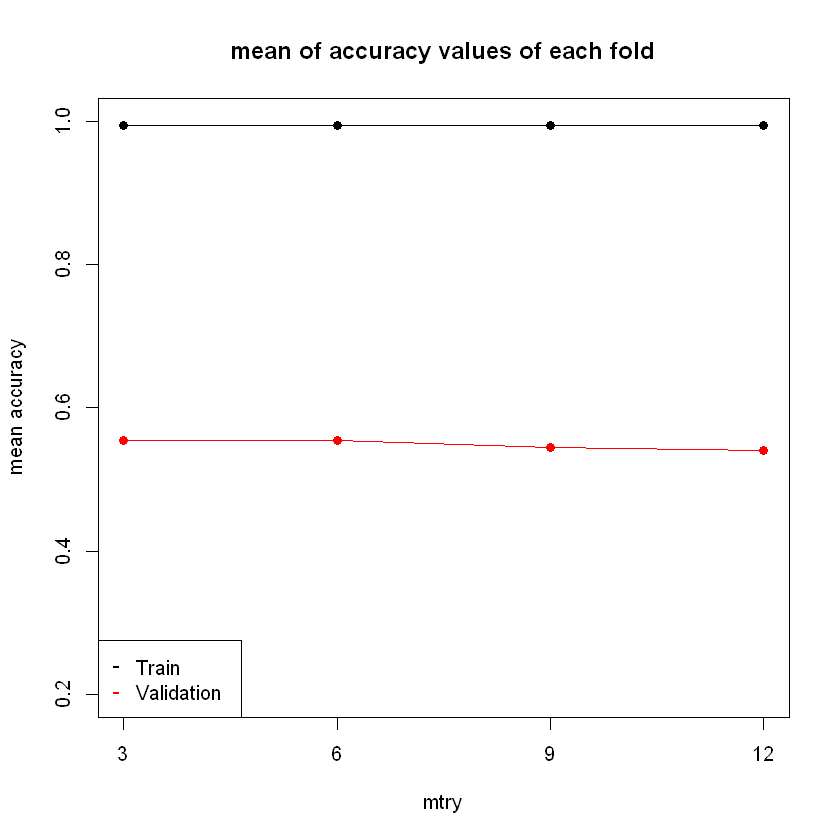

[1] Mean of mae values of each fold for training:
[1] 0.622 0.582 0.570 0.562
[1] Mean of mae values of each fold for validation:
[1] 1.308 1.326 1.327 1.332


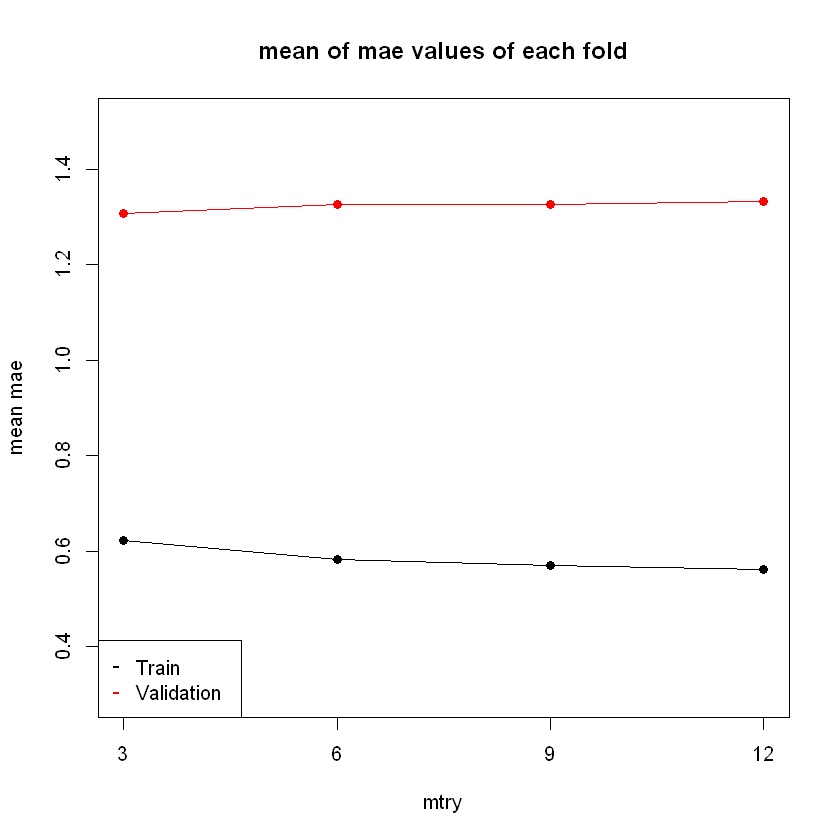

In [16]:
#We apply the same logic (which is the above logic) and cross-validation in random forest. Our changing parameter is 
#number of features on which to split each node (mtry). We fix the number of trees to 500 and minimal number of observations 
#per tree leaf to 5. The values in the following vector (mtry) are used and cross-validation is made. Then we draw again 
#the graphes for classification and regression with the same logic. 
#Here, because random forest can handle na values, we do not drop them.

set.seed(1)
mtry=c(3,6,9,12)
train_val <- sample_frac(last_data_class,0.7)
mean_acc_train=c()
mean_acc_val = c()
for (a in mtry){    
    acc_train <- rep(0,10)
    acc_val <- rep(0,10)
    for (i in 1:10) {
        indices <- (((i-1) * floor((1/10)*nrow(train_val))) + 1):((i*floor((1/10) * nrow(train_val))))
        train <- train_val[-indices,]
        val <- train_val[indices,]
        rf = randomForest(total_goals_over_2.5 ~.,data=na.roughfix(train),mtry=a,minobsinnode = 5,n.trees=500,
                          na.action=na.roughfix)
        pred_val=predict(rf, newdata=na.roughfix(val))
        pred_train=predict(rf, newdata=na.roughfix(train))
        acc_val[i] <- accuracy(val$total_goals_over_2.5 , as.factor(pred_val))
        acc_train[i] <- accuracy(train$total_goals_over_2.5 , as.factor(pred_train))
    }
    mean_acc_val=c(mean_acc_val,mean(acc_val))
    mean_acc_train=c(mean_acc_train,mean(acc_train))
    
}

plot(mtry,mean_acc_train,type="o",pch=16,col="black",ylim=c(0.2,1),xaxt="n",xlab="mtry"
     ,ylab="mean accuracy",main="mean of accuracy values of each fold")
points(mtry,mean_acc_val,type="o",pch=16,col="red")
axis(side=1,at=mtry,labels=mtry)
legend(x = "bottomleft" , legend = c("Train","Validation"),col=c("black","red"),pch="-")

print("Mean of accuracy values of each fold for training:", quote=F)
print(round(mean_acc_train,3))
print("Mean of accuracy values of each fold for validation:", quote=F)
print(round(mean_acc_val,3))

train_val <- sample_frac(last_data_reg,0.7)
mean_mae_train <- c()
mean_mae_val <- c()
for (a in mtry){    
    mae_train <- rep(0,10)
    mae_val <- rep(0,10)
    for (i in 1:10) {
        indices <- (((i-1) * floor((1/10)*nrow(train_val))) + 1):((i*floor((1/10) * nrow(train_val))))
        train <- train_val[-indices,]
        val <- train_val[indices,]
        rf = randomForest(total_goals ~.,data=na.roughfix(train),mtry=a,minobsinnode = 5,n.trees=500,
                          na.action=na.roughfix)
        pred_val=predict(rf, newdata=na.roughfix(val))
        pred_train=predict(rf, newdata=na.roughfix(train))
        mae_val[i] <- mae(val$total_goals , pred_val)
        mae_train[i] <- mae(train$total_goals , pred_train)
        
    }
    mean_mae_val=c(mean_mae_val,mean(mae_val))
    mean_mae_train=c(mean_mae_train,mean(mae_train))
    
}



plot(mtry,mean_mae_train,type="o",pch=16,col="black",ylim=c(0.3,1.5),xaxt="n",xlab="mtry"
     ,ylab="mean mae",main="mean of mae values of each fold")
points(mtry,mean_mae_val,type="o",pch=16,col="red")
axis(side=1,at=mtry,labels=mtry)
legend(x = "bottomleft" , legend = c("Train","Validation"),col=c("black","red"),pch="-")


print("Mean of mae values of each fold for training:", quote=F)
print(round(mean_mae_train,3))
print("Mean of mae values of each fold for validation:", quote=F)
print(round(mean_mae_val,3))





The best selection for mtry is seen as 3 and 6 for the classification problem.
The best selection for mtry is seen as 3 for the regression problem.

### Stochastic Gradient Boosting 

[1] Mean of accuracy values of each fold for training:
 [1] 0.864 0.889 0.907 0.986 0.992 0.993 0.994 0.994 0.994 0.947 0.965 0.974
[13] 0.994 0.994 0.994 0.994 0.994 0.994 0.969 0.981 0.987 0.994 0.994 0.994
[25] 0.994 0.994 0.994
[1] Mean of accuracy values of each fold for validation:
 [1] 0.555 0.545 0.545 0.517 0.538 0.536 0.519 0.528 0.521 0.547 0.562 0.551
[13] 0.547 0.534 0.526 0.519 0.560 0.521 0.543 0.543 0.534 0.526 0.530 0.577
[25] 0.549 0.534 0.543


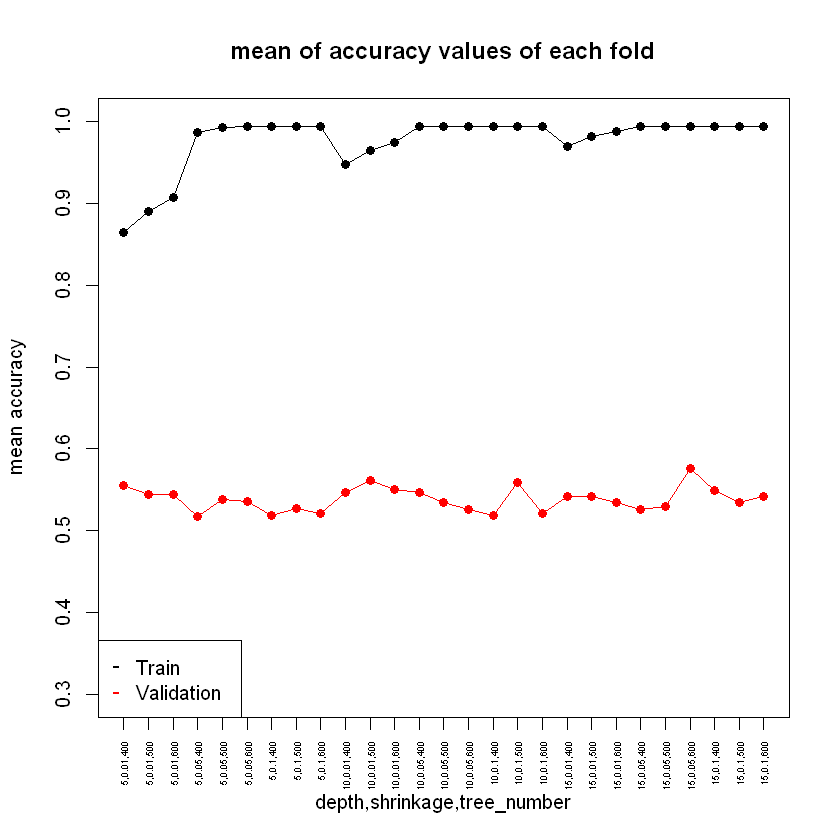

[1] Mean of mae values of each fold for training:
 [1] 1.092 1.055 1.025 0.755 0.689 0.634 0.552 0.485 0.428 0.962 0.911 0.865
[13] 0.506 0.426 0.370 0.289 0.227 0.178 0.902 0.841 0.790 0.400 0.325 0.271
[25] 0.201 0.146 0.110
[1] Mean of mae values of each fold for validation:
 [1] 1.330 1.331 1.338 1.428 1.445 1.442 1.460 1.485 1.534 1.342 1.354 1.359
[13] 1.441 1.477 1.501 1.529 1.545 1.579 1.355 1.355 1.365 1.473 1.487 1.504
[25] 1.537 1.544 1.583


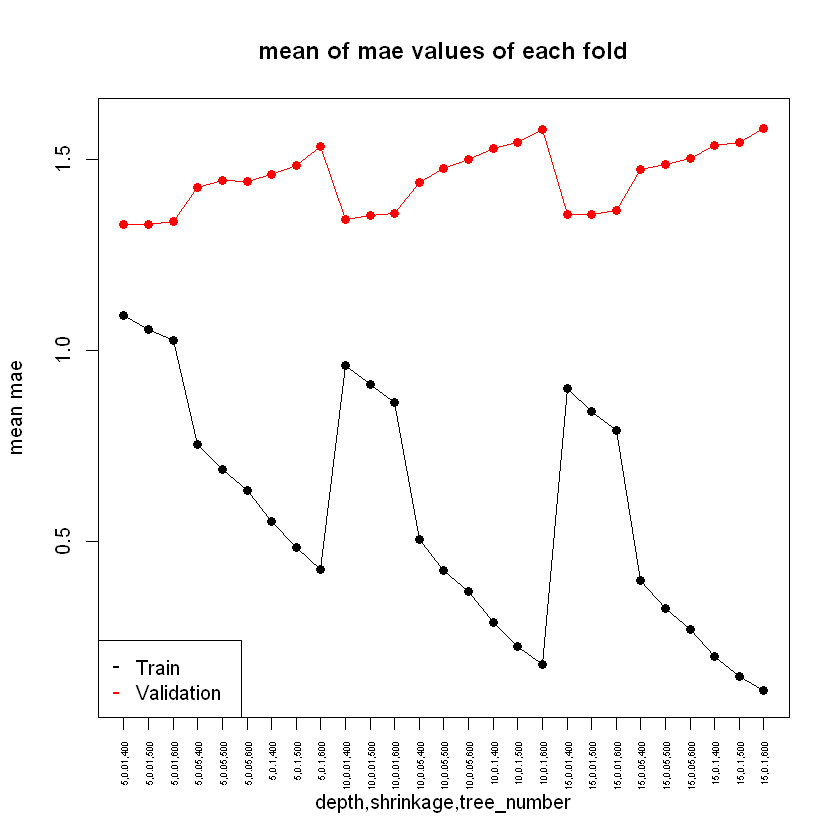

In [17]:
#Here, depth, shrinkage(learning rate) and tree number are changing parameter and we use cross validation with the same logic.
#The minimal number of observations per tree leaf is fixed as 10 in our models.
set.seed(1)
depth=c(5,10,15)
shrinkage=c(0.01,0.05,0.1)
tree_number=c(400,500,600)
train_val <- sample_frac(last_data_class,0.7)
mean_acc_train=c()
mean_acc_val = c()
for (a in depth){    
    for (b in shrinkage){
        for (c in tree_number){
            accs <- rep(0,10)
            for (i in 1:10) {
                indices <- (((i-1) * floor((1/10)*nrow(train_val))) + 1):((i*floor((1/10) * nrow(train_val))))
                train <- train_val[-indices,]
                val <- train_val[indices,]
                sgb = gbm(total_goals_over_2.5 ~.,data = train,distribution = "multinomial",shrinkage = b,
                          interaction.depth = a,n.minobsinnode = 10,n.trees = c)
                pred_val=predict.gbm(object = sgb,newdata =val,n.trees = c, type = "response")
                pred_val = colnames(pred_val)[apply(pred_val, 1, which.max)]
                pred_train=predict.gbm(object = sgb,newdata =train,n.trees = c, type = "response")
                pred_train = colnames(pred_train)[apply(pred_train, 1, which.max)]
                acc_val[i] <- accuracy(val$total_goals_over_2.5 , as.factor(pred_val))
                acc_train[i] <- accuracy(train$total_goals_over_2.5 , as.factor(pred_train))

            }

            
            mean_acc_train=c(mean_acc_train,mean(acc_train))
            mean_acc_val=c(mean_acc_val,mean(acc_val))
        }
    }
    
    
    
}


indices=c()
for (a in depth){
    for (b in shrinkage){
        for (c in tree_number){
            indices=c(indices,paste0(a,",",b,",",c))
        }
    }
}

plot(mean_acc_train,type="o",pch=16,col="black",ylim=c(0.3,1),xaxt="n",xlab="depth,shrinkage,tree_number"
     ,ylab="mean accuracy",main="mean of accuracy values of each fold")
points(mean_acc_val,type="o",pch=16,col="red")
axis(side=1,at=seq_along(indices),labels=indices,cex.axis=0.45,las=2)
legend(x = "bottomleft" , legend = c("Train","Validation"),col=c("black","red"),pch="-")

print("Mean of accuracy values of each fold for training:", quote=F)
print(round(mean_acc_train,3))
print("Mean of accuracy values of each fold for validation:", quote=F)
print(round(mean_acc_val,3))


train_val <- sample_frac(last_data_reg,0.7)
mean_mae_train <- c()
mean_mae_val <- c()
for (a in depth){    
    for (b in shrinkage){
        for (c in tree_number){
            mae_train <- rep(0,10)
            mae_val <- rep(0,10)
            for (i in 1:10) {
                
                indices <- (((i-1) * floor((1/10)*nrow(train_val))) + 1):((i*floor((1/10) * nrow(train_val))))
                train <- train_val[-indices,]
                val <- train_val[indices,]
                sgb = gbm(total_goals ~.,data = train,distribution = "gaussian",shrinkage = b,
                          interaction.depth = a,n.minobsinnode = 10,n.trees = c)
                pred_val=predict.gbm(object = sgb,newdata =val,n.trees = c)
                pred_train=predict.gbm(object = sgb,newdata =train,n.trees = c)
                mae_val[i] <- mae(val$total_goals , pred_val)
                mae_train[i] <- mae(train$total_goals , pred_train)
                
            }

           
            mean_mae_val=c(mean_mae_val,mean(mae_val))
            mean_mae_train=c(mean_mae_train,mean(mae_train))
        }
    }
    
    
    
}


indices=c()
for (a in depth){
    for (b in shrinkage){
        for (c in tree_number){
            indices=c(indices,paste0(a,",",b,",",c))
        }
    }
}



plot(mean_mae_train,type="o",pch=16,col="black",ylim=c(0.1,1.6),xaxt="n",xlab="depth,shrinkage,tree_number"
     ,ylab="mean mae",main="mean of mae values of each fold")
points(mean_mae_val,type="o",pch=16,col="red")
axis(side=1,at=seq_along(indices),labels=indices,cex.axis=0.45,las=2)
legend(x = "bottomleft" , legend = c("Train","Validation"),col=c("black","red"),pch="-")



print("Mean of mae values of each fold for training:", quote=F)
print(round(mean_mae_train,3))
print("Mean of mae values of each fold for validation:", quote=F)
print(round(mean_mae_val,3))



The best selection for depth,shrinkage,tree_number is seen as (15,0.05,600) for the classification problem. The best selection for depth,shrinkage,tree_number is seen as (15,0.05,400) for the regression problem.

# Task4

In [18]:
#Here, after choosing the parameters in Task 3, we trained our models with these parameters and tested these models like we
#did in task 2. Doing this, we tried to find better accuracy and mae values than we found in Task 2.

set.seed(1)

train_pr <- sample_frac(last_data_class, 0.70,)
sample_id <- as.numeric(rownames(train_pr)) # rownames() returns character so as.numeric
test_pr <- last_data_class[-sample_id,]
train_pr=train_pr %>% drop_na(prob1)
test_pr=test_pr %>% drop_na(prob1)

pr=glmnet(as.matrix(train_pr[,1:(ncol(train_pr)-1)]),train_pr[,ncol(train_pr)],family="binomial",lambda=0.001)
pred=predict(pr,newx=as.matrix(test_pr[,1:(ncol(test_pr)-1)]),type="class")
print(paste0("Penalized regression accuracy is ",round(accuracy(test_pr$total_goals_over_2.5 , as.factor(pred)),3)))


train_pr <- sample_frac(last_data_reg, 0.70,)
sample_id <- as.numeric(rownames(train_pr)) # rownames() returns character so as.numeric
test_pr <- last_data_reg[-sample_id,]
train_pr=train_pr %>% drop_na(prob1)
test_pr=test_pr %>% drop_na(prob1)

pr=glmnet(as.matrix(train_pr[,1:(ncol(train_pr)-1)]),train_pr[,ncol(train_pr)],lambda=0.025)
pred=predict(pr,newx=as.matrix(test_pr[,1:(ncol(test_pr)-1)]))
print(paste0("Penalized regression mae is ",round(mae(test_pr$total_goals , pred),3)))


train_dt <- sample_frac(last_data_class, 0.70,)
sample_id <- as.numeric(rownames(train_dt)) # rownames() returns character so as.numeric
test_dt <- last_data_class[-sample_id,]

tree=rpart(total_goals_over_2.5~.,data=train_dt,method='class',control=rpart.control(cp=0.025,minobsinnode = 5))
pred=predict(tree, newdata=test_dt,type="class")
print(paste0("Decision tree accuracy is ",round(accuracy(test_dt$total_goals_over_2.5 , as.factor(pred)),3)))
tree=rpart(total_goals_over_2.5~.,data=train_dt,method='class',control=rpart.control(cp=0.025,minobsinnode = 10))
pred=predict(tree, newdata=test_dt,type="class")
print(paste0("Decision tree accuracy is ",round(accuracy(test_dt$total_goals_over_2.5 , as.factor(pred)),3)))
tree=rpart(total_goals_over_2.5~.,data=train_dt,method='class',control=rpart.control(cp=0.025,minobsinnode = 15))
pred=predict(tree, newdata=test_dt,type="class")
print(paste0("Decision tree accuracy is ",round(accuracy(test_dt$total_goals_over_2.5 , as.factor(pred)),3)))
tree=rpart(total_goals_over_2.5~.,data=train_dt,method='class',control=rpart.control(cp=0.025,minobsinnode = 20))
pred=predict(tree, newdata=test_dt,type="class")
print(paste0("Decision tree accuracy is ",round(accuracy(test_dt$total_goals_over_2.5 , as.factor(pred)),3)))


train_dt <- sample_frac(last_data_reg, 0.70,)
sample_id <- as.numeric(rownames(train_dt)) # rownames() returns character so as.numeric
test_dt <- last_data_reg[-sample_id,]

tree=rpart(total_goals~.,data=train_dt,control=rpart.control(cp=0.025,minobsinnode = 5))
pred=predict(tree, newdata=test_dt)
print(paste0("Decision tree mae is ",round(mae(test_dt$total_goals , pred),3)))
tree=rpart(total_goals~.,data=train_dt,control=rpart.control(cp=0.025,minobsinnode = 10))
pred=predict(tree, newdata=test_dt)
print(paste0("Decision tree mae is ",round(mae(test_dt$total_goals , pred),3)))
tree=rpart(total_goals~.,data=train_dt,control=rpart.control(cp=0.025,minobsinnode = 15))
pred=predict(tree, newdata=test_dt)
print(paste0("Decision tree mae is ",round(mae(test_dt$total_goals , pred),3)))
tree=rpart(total_goals~.,data=train_dt,control=rpart.control(cp=0.025,minobsinnode = 20))
pred=predict(tree, newdata=test_dt)
print(paste0("Decision tree mae is ",round(mae(test_dt$total_goals , pred),3)))


train_rf <- sample_frac(last_data_class, 0.70,)
sample_id <- as.numeric(rownames(train_rf)) # rownames() returns character so as.numeric
test_rf <- last_data_class[-sample_id,]

rf = randomForest(total_goals_over_2.5 ~.,data=na.roughfix(train_rf),mtry=3,minobsinnode = 5,n.trees=500,na.action=na.roughfix)
pred=predict(rf, newdata=na.roughfix(test_rf))
print(paste0("Random forest accuracy is ",round(accuracy(test_rf$total_goals_over_2.5 , as.factor(pred)),3)))

rf = randomForest(total_goals_over_2.5 ~.,data=na.roughfix(train_rf),mtry=6,minobsinnode = 5,n.trees=500,na.action=na.roughfix)
pred=predict(rf, newdata=na.roughfix(test_rf))
print(paste0("Random forest accuracy is ",round(accuracy(test_rf$total_goals_over_2.5 , as.factor(pred)),3)))

train_rf <- sample_frac(last_data_reg, 0.70,)
sample_id <- as.numeric(rownames(train_rf)) # rownames() returns character so as.numeric
test_rf <- last_data_reg[-sample_id,]

rf = randomForest(total_goals ~.,data=na.roughfix(train_rf),mtry=3,minobsinnode = 5,n.trees=500,na.action=na.roughfix)
pred=predict(rf, newdata=na.roughfix(test_rf))
print(paste0("Random forest mae is ",round(mae(test_rf$total_goals , pred),3)))



train_sgb <- sample_frac(last_data_class, 0.70,)
sample_id <- as.numeric(rownames(train_sgb)) # rownames() returns character so as.numeric
test_sgb <- last_data_class[-sample_id,]

sgb = gbm(total_goals_over_2.5 ~.,data = train_sgb,distribution = "multinomial",shrinkage = 0.05,interaction.depth = 15,
              n.minobsinnode = 10,n.trees = 600)
pred=predict.gbm(object = sgb,newdata = test_sgb,n.trees = 600, type = "response")
pred = colnames(pred)[apply(pred, 1, which.max)]
print(paste0("Stochastic gradient boosting accuracy is ",round(accuracy(test_sgb$total_goals_over_2.5 , as.factor(pred)),3)))


train_sgb <- sample_frac(last_data_reg, 0.70,)
sample_id <- as.numeric(rownames(train_sgb)) # rownames() returns character so as.numeric
test_sgb <- last_data_reg[-sample_id,]

sgb = gbm(total_goals ~.,data = train_sgb,shrinkage = 0.05,distribution = "gaussian",interaction.depth = 15,
              n.minobsinnode = 10,n.trees = 400)
pred=predict.gbm(object = sgb,newdata = test_sgb,n.trees = 400)
print(paste0("Stochastic gradient boosting mae is ",round(mae(test_sgb$total_goals , pred),3)))

[1] "Penalized regression accuracy is 0.543"
[1] "Penalized regression mae is 1.252"
[1] "Decision tree accuracy is 0.61"
[1] "Decision tree accuracy is 0.61"
[1] "Decision tree accuracy is 0.61"
[1] "Decision tree accuracy is 0.61"
[1] "Decision tree mae is 1.266"
[1] "Decision tree mae is 1.266"
[1] "Decision tree mae is 1.266"
[1] "Decision tree mae is 1.266"
[1] "Random forest accuracy is 0.868"
[1] "Random forest accuracy is 0.868"
[1] "Random forest mae is 0.792"
[1] "Stochastic gradient boosting accuracy is 0.854"
[1] "Stochastic gradient boosting mae is 0.676"


After training models and testing them with parameters found according to cross-validation, we see that for some models we obtained better accuracy and mean absoulte error values than we found in task 2. However, in some cases we obtained the same result and in some cases we obtained even worse results than we found in task 2. The reason especially behind finding worse results my be misinterpreting cross-validation results. Also, while looking at the results of folds usage of variance or other statistical approach can be brought in addition to mean of error (or accuracy) values. Lastly, cross-validation may be applied with more levels of related parameter.

When we think about validation error in cross-validation, we see that cross-validation error rate is consistent with test error rate in penalized regression and decision tree model. Here, we compare the results found in task 3 and task 4 and say this conclusion. However, for random forest and for stochastic gradient boosting better results were found in task 4 compared to validation error of task 3. Here, while evaluating we look at the validation error coming from task 3 for the choosen parameters and compare it to the results found in task 4. We can think that this positive difference appeared because of more complex structure of random forest and stochastic gradient approaches and because of the fact that, at least for our cases, they are better learners.

We see that for more complex learners we get better accuracy and mean absolute error values at least for our cases. Random forest and stochastic gradient boosting work better.

In order to evaluate a possible indication of underfitting or overfitting, let's run the same code above again, but this time adding training errors as well.

In [19]:
set.seed(1)

train_pr <- sample_frac(last_data_class, 0.70,)
sample_id <- as.numeric(rownames(train_pr)) # rownames() returns character so as.numeric
test_pr <- last_data_class[-sample_id,]
train_pr=train_pr %>% drop_na(prob1)
test_pr=test_pr %>% drop_na(prob1)

pr=glmnet(as.matrix(train_pr[,1:(ncol(train_pr)-1)]),train_pr[,ncol(train_pr)],family="binomial",lambda=0.001)
pred=predict(pr,newx=as.matrix(train_pr[,1:(ncol(train_pr)-1)]),type="class")
print(paste0("Penalized regression training accuracy is ",round(accuracy(train_pr$total_goals_over_2.5 , as.factor(pred)),3)))
pred=predict(pr,newx=as.matrix(test_pr[,1:(ncol(test_pr)-1)]),type="class")
print(paste0("Penalized regression test accuracy is ",round(accuracy(test_pr$total_goals_over_2.5 , as.factor(pred)),3)))


train_pr <- sample_frac(last_data_reg, 0.70,)
sample_id <- as.numeric(rownames(train_pr)) # rownames() returns character so as.numeric
test_pr <- last_data_reg[-sample_id,]
train_pr=train_pr %>% drop_na(prob1)
test_pr=test_pr %>% drop_na(prob1)

pr=glmnet(as.matrix(train_pr[,1:(ncol(train_pr)-1)]),train_pr[,ncol(train_pr)],lambda=0.025)
pred=predict(pr,newx=as.matrix(train_pr[,1:(ncol(train_pr)-1)]))
print(paste0("Penalized regression training mae is ",round(mae(train_pr$total_goals , pred),3)))
pred=predict(pr,newx=as.matrix(test_pr[,1:(ncol(test_pr)-1)]))
print(paste0("Penalized regression test mae is ",round(mae(test_pr$total_goals , pred),3)))


train_dt <- sample_frac(last_data_class, 0.70,)
sample_id <- as.numeric(rownames(train_dt)) # rownames() returns character so as.numeric
test_dt <- last_data_class[-sample_id,]

tree=rpart(total_goals_over_2.5~.,data=train_dt,method='class',control=rpart.control(cp=0.025,minobsinnode = 5))
pred=predict(tree, newdata=train_dt,type="class")
print(paste0("Decision tree training accuracy is ",round(accuracy(train_dt$total_goals_over_2.5 , as.factor(pred)),3)))
pred=predict(tree, newdata=test_dt,type="class")
print(paste0("Decision tree test accuracy is ",round(accuracy(test_dt$total_goals_over_2.5 , as.factor(pred)),3)))
tree=rpart(total_goals_over_2.5~.,data=train_dt,method='class',control=rpart.control(cp=0.025,minobsinnode = 10))
pred=predict(tree, newdata=train_dt,type="class")
print(paste0("Decision tree training accuracy is ",round(accuracy(train_dt$total_goals_over_2.5 , as.factor(pred)),3)))
pred=predict(tree, newdata=test_dt,type="class")
print(paste0("Decision tree test accuracy is ",round(accuracy(test_dt$total_goals_over_2.5 , as.factor(pred)),3)))
tree=rpart(total_goals_over_2.5~.,data=train_dt,method='class',control=rpart.control(cp=0.025,minobsinnode = 15))
pred=predict(tree, newdata=train_dt,type="class")
print(paste0("Decision tree training accuracy is ",round(accuracy(train_dt$total_goals_over_2.5 , as.factor(pred)),3)))
pred=predict(tree, newdata=test_dt,type="class")
print(paste0("Decision tree test accuracy is ",round(accuracy(test_dt$total_goals_over_2.5 , as.factor(pred)),3)))
tree=rpart(total_goals_over_2.5~.,data=train_dt,method='class',control=rpart.control(cp=0.025,minobsinnode = 20))
pred=predict(tree, newdata=train_dt,type="class")
print(paste0("Decision tree training accuracy is ",round(accuracy(train_dt$total_goals_over_2.5 , as.factor(pred)),3)))
pred=predict(tree, newdata=test_dt,type="class")
print(paste0("Decision tree test accuracy is ",round(accuracy(test_dt$total_goals_over_2.5 , as.factor(pred)),3)))


train_dt <- sample_frac(last_data_reg, 0.70,)
sample_id <- as.numeric(rownames(train_dt)) # rownames() returns character so as.numeric
test_dt <- last_data_reg[-sample_id,]

tree=rpart(total_goals~.,data=train_dt,control=rpart.control(cp=0.025,minobsinnode = 5))
pred=predict(tree, newdata=train_dt)
print(paste0("Decision tree training mae is ",round(mae(train_dt$total_goals , pred),3)))
pred=predict(tree, newdata=test_dt)
print(paste0("Decision tree test mae is ",round(mae(test_dt$total_goals , pred),3)))
tree=rpart(total_goals~.,data=train_dt,control=rpart.control(cp=0.025,minobsinnode = 10))
pred=predict(tree, newdata=train_dt)
print(paste0("Decision tree training mae is ",round(mae(train_dt$total_goals , pred),3)))
pred=predict(tree, newdata=test_dt)
print(paste0("Decision tree test mae is ",round(mae(test_dt$total_goals , pred),3)))
tree=rpart(total_goals~.,data=train_dt,control=rpart.control(cp=0.025,minobsinnode = 15))
pred=predict(tree, newdata=train_dt)
print(paste0("Decision tree training mae is ",round(mae(train_dt$total_goals , pred),3)))
pred=predict(tree, newdata=test_dt)
print(paste0("Decision tree test mae is ",round(mae(test_dt$total_goals , pred),3)))
tree=rpart(total_goals~.,data=train_dt,control=rpart.control(cp=0.025,minobsinnode = 20))
pred=predict(tree, newdata=train_dt)
print(paste0("Decision tree training mae is ",round(mae(train_dt$total_goals , pred),3)))
pred=predict(tree, newdata=test_dt)
print(paste0("Decision tree test mae is ",round(mae(test_dt$total_goals , pred),3)))


train_rf <- sample_frac(last_data_class, 0.70,)
sample_id <- as.numeric(rownames(train_rf)) # rownames() returns character so as.numeric
test_rf <- last_data_class[-sample_id,]

rf = randomForest(total_goals_over_2.5 ~.,data=na.roughfix(train_rf),mtry=3,minobsinnode = 5,n.trees=500,na.action=na.roughfix)
pred=predict(rf, newdata=na.roughfix(train_rf))
print(paste0("Random forest training accuracy is ",round(accuracy(train_rf$total_goals_over_2.5 , as.factor(pred)),3)))
pred=predict(rf, newdata=na.roughfix(test_rf))
print(paste0("Random forest test accuracy is ",round(accuracy(test_rf$total_goals_over_2.5 , as.factor(pred)),3)))

rf = randomForest(total_goals_over_2.5 ~.,data=na.roughfix(train_rf),mtry=6,minobsinnode = 5,n.trees=500,na.action=na.roughfix)
pred=predict(rf, newdata=na.roughfix(train_rf))
print(paste0("Random forest training accuracy is ",round(accuracy(train_rf$total_goals_over_2.5 , as.factor(pred)),3)))
pred=predict(rf, newdata=na.roughfix(test_rf))
print(paste0("Random forest test accuracy is ",round(accuracy(test_rf$total_goals_over_2.5 , as.factor(pred)),3)))

train_rf <- sample_frac(last_data_reg, 0.70,)
sample_id <- as.numeric(rownames(train_rf)) # rownames() returns character so as.numeric
test_rf <- last_data_reg[-sample_id,]

rf = randomForest(total_goals ~.,data=na.roughfix(train_rf),mtry=3,minobsinnode = 5,n.trees=500,na.action=na.roughfix)
pred=predict(rf, newdata=na.roughfix(train_rf))
print(paste0("Random forest training mae is ",round(mae(train_rf$total_goals , pred),3)))
pred=predict(rf, newdata=na.roughfix(test_rf))
print(paste0("Random forest test mae is ",round(mae(test_rf$total_goals , pred),3)))



train_sgb <- sample_frac(last_data_class, 0.70,)
sample_id <- as.numeric(rownames(train_sgb)) # rownames() returns character so as.numeric
test_sgb <- last_data_class[-sample_id,]

sgb = gbm(total_goals_over_2.5 ~.,data = train_sgb,distribution = "multinomial",shrinkage = 0.05,interaction.depth = 15,
              n.minobsinnode = 10,n.trees = 600)
pred=predict.gbm(object = sgb,newdata = train_sgb,n.trees = 600, type = "response")
pred = colnames(pred)[apply(pred, 1, which.max)]
print(paste0("Stochastic gradient boosting training accuracy is ",round(accuracy(train_sgb$total_goals_over_2.5 
                                                                                 , as.factor(pred)),3)))
pred=predict.gbm(object = sgb,newdata = test_sgb,n.trees = 600, type = "response")
pred = colnames(pred)[apply(pred, 1, which.max)]
print(paste0("Stochastic gradient boosting test accuracy is ",round(accuracy(test_sgb$total_goals_over_2.5 
                                                                                 , as.factor(pred)),3)))


train_sgb <- sample_frac(last_data_reg, 0.70,)
sample_id <- as.numeric(rownames(train_sgb)) # rownames() returns character so as.numeric
test_sgb <- last_data_reg[-sample_id,]

sgb = gbm(total_goals ~.,data = train_sgb,shrinkage = 0.05,distribution = "gaussian",interaction.depth = 15,
              n.minobsinnode = 10,n.trees = 400)
pred=predict.gbm(object = sgb,newdata = train_sgb,n.trees = 400)
print(paste0("Stochastic gradient boosting training mae is ",round(mae(train_sgb$total_goals , pred),3)))
pred=predict.gbm(object = sgb,newdata = test_sgb,n.trees = 400)
print(paste0("Stochastic gradient boosting test mae is ",round(mae(test_sgb$total_goals , pred),3)))

[1] "Penalized regression training accuracy is 0.59"
[1] "Penalized regression test accuracy is 0.543"
[1] "Penalized regression training mae is 1.283"
[1] "Penalized regression test mae is 1.252"
[1] "Decision tree training accuracy is 0.65"
[1] "Decision tree test accuracy is 0.61"
[1] "Decision tree training accuracy is 0.65"
[1] "Decision tree test accuracy is 0.61"
[1] "Decision tree training accuracy is 0.65"
[1] "Decision tree test accuracy is 0.61"
[1] "Decision tree training accuracy is 0.65"
[1] "Decision tree test accuracy is 0.61"
[1] "Decision tree training mae is 1.326"
[1] "Decision tree test mae is 1.266"
[1] "Decision tree training mae is 1.326"
[1] "Decision tree test mae is 1.266"
[1] "Decision tree training mae is 1.326"
[1] "Decision tree test mae is 1.266"
[1] "Decision tree training mae is 1.326"
[1] "Decision tree test mae is 1.266"
[1] "Random forest training accuracy is 0.998"
[1] "Random forest test accuracy is 0.868"
[1] "Random forest training accuracy is 0

We see an indication of overfitting for regression problem of stochastic gradient boosting. The mean absolute error for training is 0.375 and this value is 0.676 for test. In my opinion, this difference can be seen as a  remarkable difference and this is an indication of overfitting. I do not think that for other training and test error value pairs there exists a remarkable difference that will be an indication of overfitting.

We may think an indication of underfitting in penalized regression and decision tree because their training error values are a bit large and test errors are similar to related training errors as well. Especially when we look at the accuracy we see that they are close to 50% and because our accuracy problem is a binary problem even if model makes random prediction, it may find similar results to the results found above.